In [ ]:
"""
Reto: Explorando el índice de felicidad

Indicaciones:

•	Una vez terminado el reto deberás subir a la plataforma el enlace generado.

Instrucciones:
El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
1.	Producción económica
2.	Apoyo social
3.	Esperanza de vida
4.	Libertad
5.	Generosidad
6.	Ausencia de corrupción
El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.
En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.
Para lograr lo anterior, descarga el archivo Happiness_reporte.csv y el dataframe Metadata.csv, y realiza los siguientes pasos:


**Pagina para identacion en python https://codebeautify.org/python-formatter-beautifier# :P
"""

# Importación librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch

"""
1.	Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.
2.	Guarda en un dataframe (Metadata) todos los registros del archivo  Metadata.csv.
"""
# Declaracion de variables
# Definir la fecha de consulta
# fecha_query = "2021-01-29"
# fecha_antes = "2020-12-20"
mostrar = 5

# Leer el archivo Happiness_report.csv
happiness = pd.read_csv("/content/Happiness_report.csv")
print("Se muestra la estructura y tipos de datos Happiness_report")
print("\n")
# estructura y tipos de datos
happiness.info()
print("\n")

# Leer el archivo Metadata.csv
metadata = pd.read_csv("/content/Metadata.csv")
print("Se muestra la estructura y tipos de datos Metadata")
print("\n")
# estructura y tipos de datos
metadata.info()
print("\n")

Se muestra la estructura y tipos de datos Happiness_report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Se muestra la estructura y tipos de datos Metadata


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 

In [ ]:
"""
3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México.
    Haz que la columna Country or region quede como índice.
"""
# Filtrar los datos para obtener la información de México
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Establecer la columna "Country or region" como índice
mexico.set_index('Country or region', inplace=True)

# Mostrar los primeros registros del DataFrame resultante
print("DataFrame México:")
print(mexico.head(mostrar))

DataFrame México:
                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


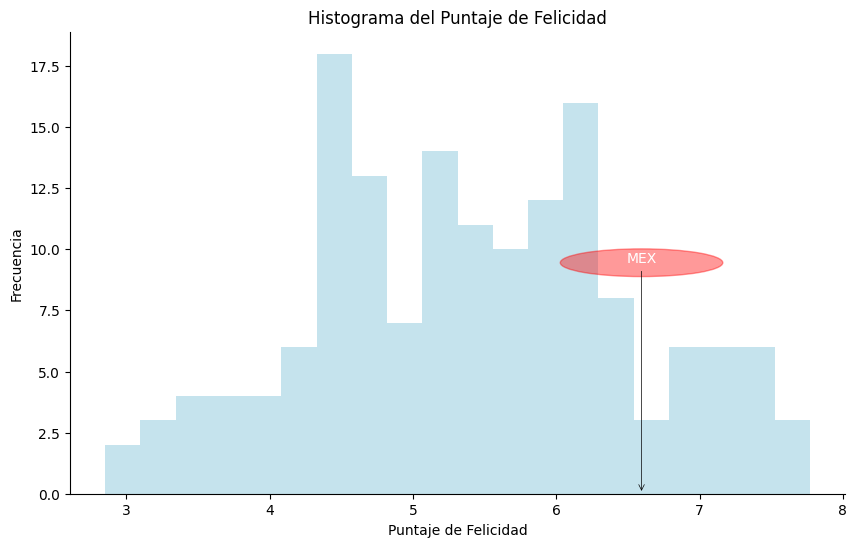

In [ ]:
"""
4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente.
Ubica el valor de México con una etiqueta de texto. Ejemplo:
"""

# Crear el histograma del puntaje (score) con un color pastel
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, edgecolor='black', alpha=0.7, lw=0, color='lightblue')  # Establecer lw=0 para hacer las barras continuas y color pastel

# Añadir la etiqueta "MEX" con una flecha
score_mexico = mexico['Score'].values[0]
plt.annotate('MEX', xy=(score_mexico, 0), xytext=(score_mexico, plt.ylim()[1]*0.5),
             arrowprops=dict(arrowstyle="->", color="black", linewidth=0.5), ha='center', fontsize=10, color='white')

# Añadir un círculo rojo alrededor de la etiqueta "MEX"
circle_radius = plt.ylim()[1]*0.03  # Define el radio del círculo
circle = plt.Circle((score_mexico, plt.ylim()[1]*0.5), circle_radius, color='red', alpha=0.4)
plt.gca().add_patch(circle)

# Añadir títulos y etiquetas
plt.title('Histograma del Puntaje de Felicidad')
plt.xlabel('Puntaje de Felicidad')
plt.ylabel('Frecuencia')

# Quitar la división de la gráfica y hacerla continua
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

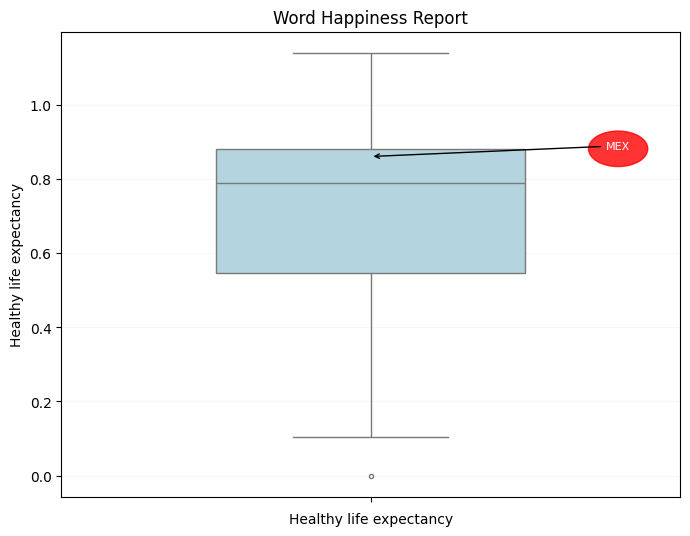

In [ ]:
"""
5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy).
    Ubica el valor de México con una anotación.
"""

from matplotlib.patches import Circle, FancyArrowPatch

# Obtener el valor de la esperanza de vida saludable para México
healthy_life_mexico = happiness.loc[happiness['Country or region'] == 'Mexico', 'Healthy life expectancy'].values[0]

# Crear el boxplot con Seaborn
plt.figure(figsize=(7, 5))
sns.boxplot(y=happiness['Healthy life expectancy'], color='lightblue', linewidth=1, fliersize=3, width=0.5)  # Cambio en el ancho del boxplot

# Calcular el tercer cuartil
third_quartile = happiness['Healthy life expectancy'].quantile(0.75)

# Añadir la anotación del país en un círculo rojo con letras blancas flecha
plt.annotate('MEX', xy=(0, healthy_life_mexico), xytext=(0.4, third_quartile), color='white', ha='center', fontsize=8, arrowprops=dict(arrowstyle="->", color="black"))

# Calcular el tamaño del círculo en función del tamaño de la figura
circle_radius = 0.04 * plt.gca().get_ylim()[1]  # Ajuste el factor 0.01 según sea necesario

# Añadir un círculo rojo alrededor de la anotación
circle = Circle((0.4, third_quartile), circle_radius, edgecolor='red', facecolor='red', alpha=0.8)
plt.gca().add_patch(circle)

# Ajustar los ejes
plt.grid(axis='y', linestyle='-', alpha=0.1)
plt.tight_layout()

# Añadir títulos y etiquetas
plt.title('Word Happiness Report')
plt.xlabel('Healthy life expectancy')

# Mostrar el gráfico
plt.show()


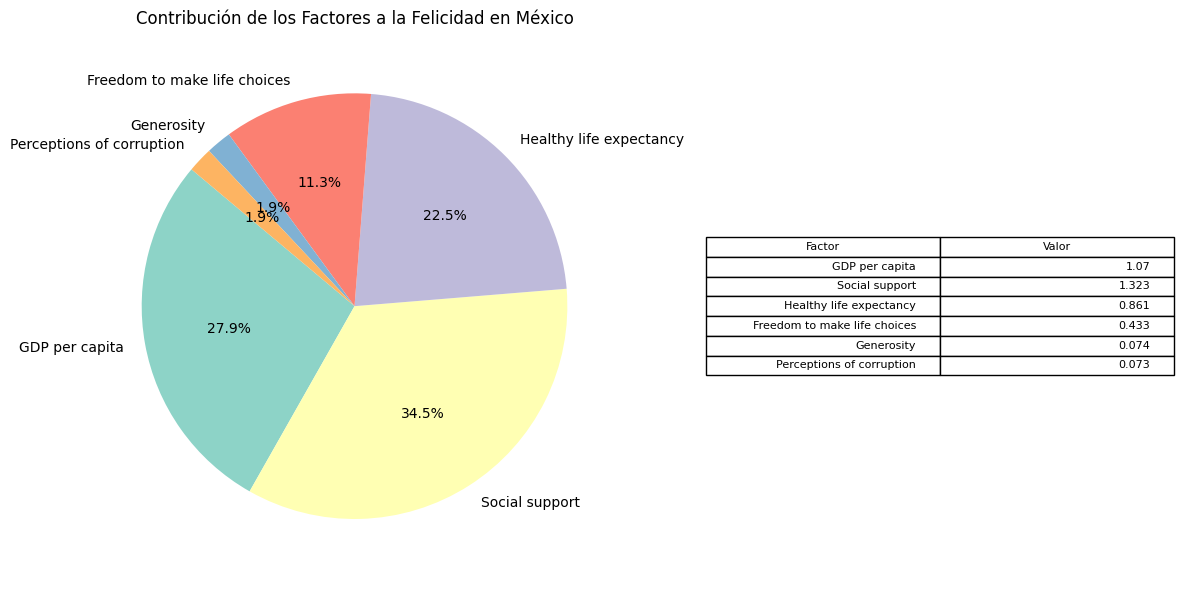

In [ ]:
"""
6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen
    a evaluar la felicidad en México.
"""

# Seleccionar las columnas relevantes para los factores de felicidad
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Extraer los valores de estos factores para México
valores_mexico = mexico[factores].values[0]

# Crear un DataFrame modificado para la gráfica circular
data = pd.DataFrame({
    'Factor': factores,
    'Valor': valores_mexico
})

# Crear la gráfica circular
plt.figure(figsize=(12, 6))

# Subplot para la gráfica circular
plt.subplot(121)
plt.pie(data['Valor'], labels=data['Factor'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Contribución de los Factores a la Felicidad en México')
plt.axis('equal')  # Para asegurar que el pie chart es un círculo

# Subplot para la tabla de factores
plt.subplot(122)
plt.table(cellText=data.values, colLabels=data.columns, loc='center')
plt.axis('off')  # Para ocultar los ejes de la tabla

# Mostrar el gráfico
plt.tight_layout()
plt.show()

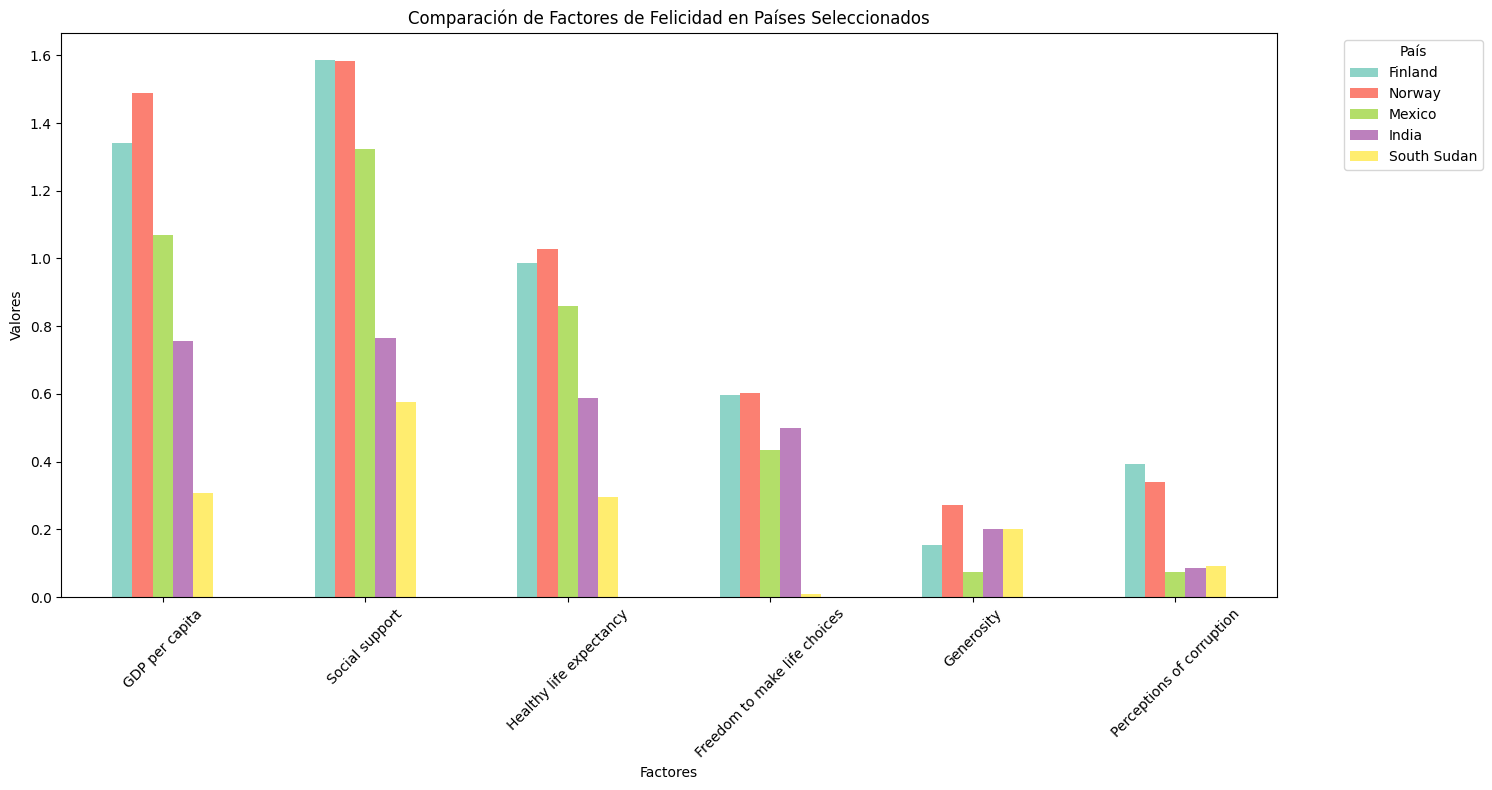

In [ ]:
"""
7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz,
    México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.
"""

# Identificar el país más feliz, el país menos feliz, México y dos países adicionales
pais_mas_feliz = happiness.loc[happiness['Score'].idxmax()]['Country or region']
pais_menos_feliz = happiness.loc[happiness['Score'].idxmin()]['Country or region']
pais_interes_1 = 'Norway'  # Puedes cambiarlo por el país que prefieras
pais_interes_2 = 'India'   # Puedes cambiarlo por el país que prefieras

# Filtrar el DataFrame para obtener los datos de los 5 países
paises_interes = ['Mexico', pais_mas_feliz, pais_menos_feliz, pais_interes_1, pais_interes_2]
filtered_happiness = happiness[happiness['Country or region'].isin(paises_interes)]

# Seleccionar los factores relevantes
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Configurar el DataFrame para la visualización
filtered_happiness = filtered_happiness.set_index('Country or region')[factores]

# Visualizar los factores en una misma gráfica
filtered_happiness.T.plot(kind='bar', figsize=(15, 8), colormap='Set3')

# Añadir títulos y etiquetas
plt.title('Comparación de Factores de Felicidad en Países Seleccionados')
plt.xlabel('Factores')
plt.ylabel('Valores')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


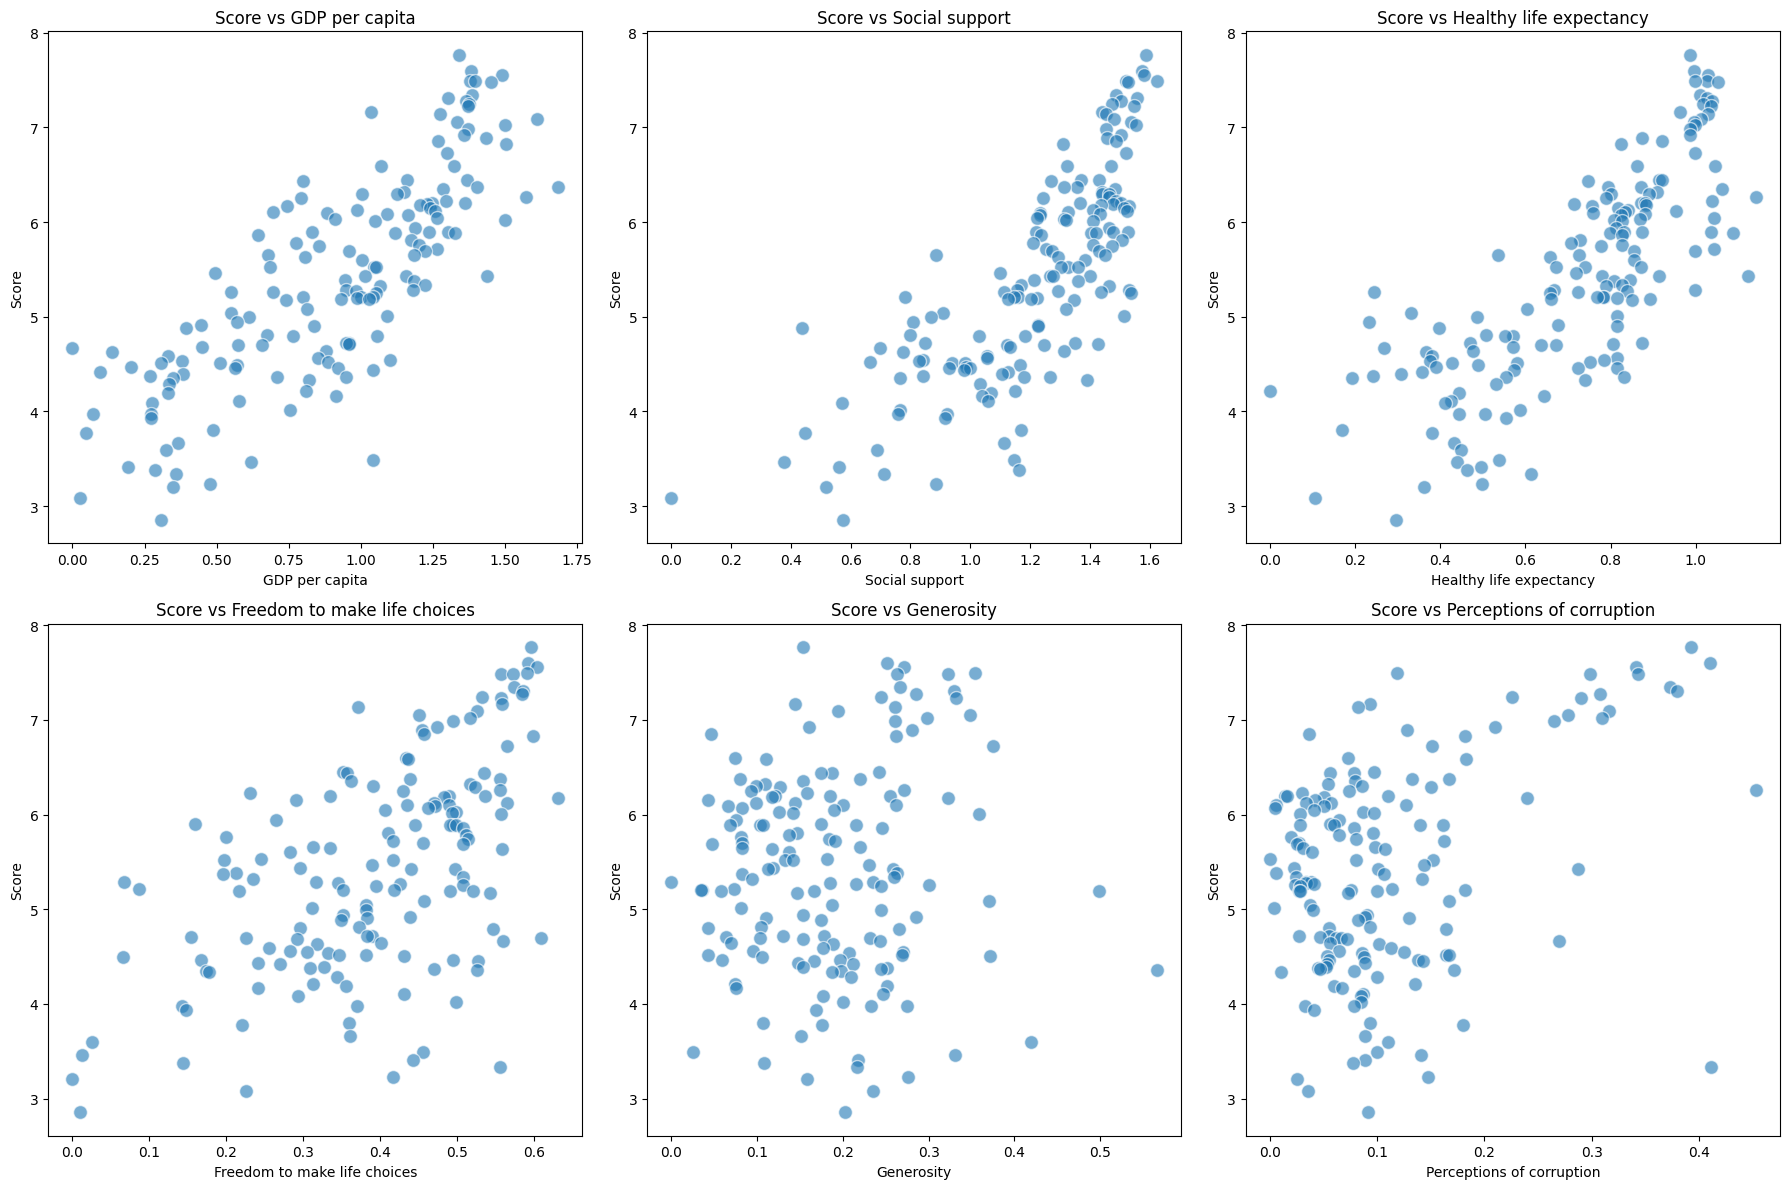

In [ ]:
"""
8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores,
    para determinar qué factor influye más en la evaluación.
"""

# Seleccionar los factores relevantes
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crear una matriz de subgráficas de 2x3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Crear scatter plots del puntaje (score) versus los 6 factores
for i, factor in enumerate(factores):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(happiness[factor], happiness['Score'], alpha=0.6, edgecolors='w', s=100)
    axs[row, col].set_title(f'Score vs {factor}')
    axs[row, col].set_xlabel(factor)
    axs[row, col].set_ylabel('Score')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la matriz de subgráficas
plt.show()


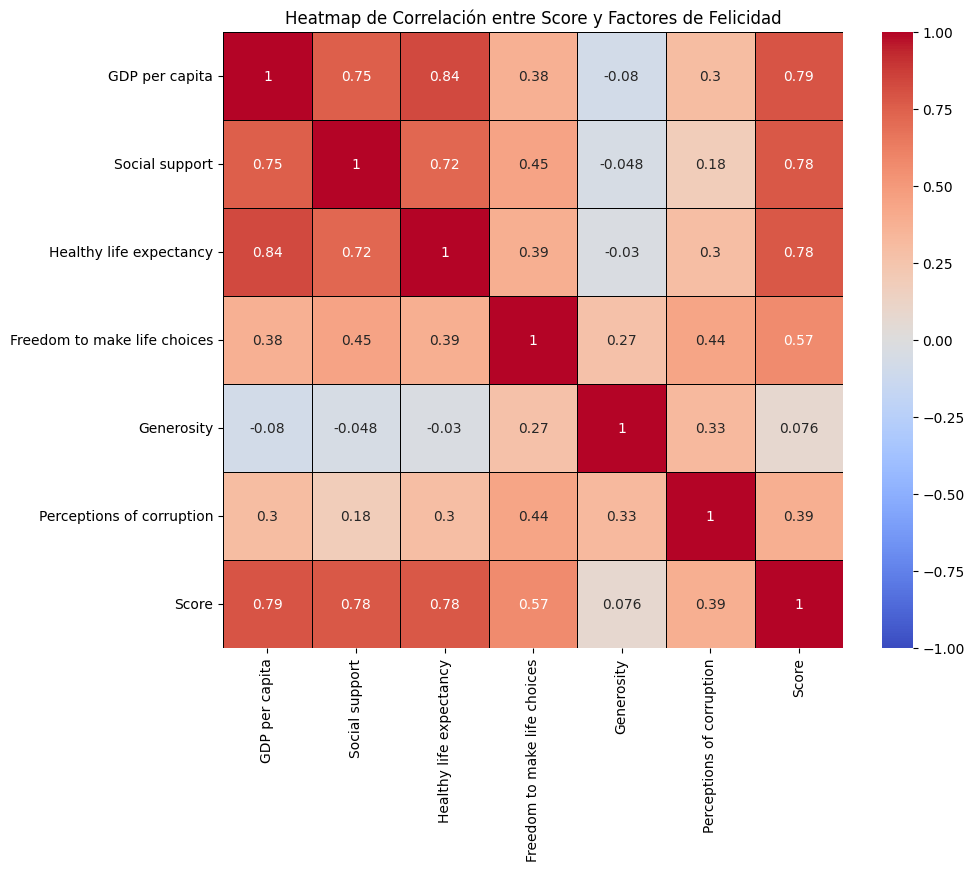

In [ ]:
"""
Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.
"""

# Seleccionar los factores relevantes
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Añadir la columna 'Score' a la lista de factores para calcular la correlación
factores_con_score = factores + ['Score']

# Calcular la matriz de correlación
corr_matrix = happiness[factores_con_score].corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Añadir un título
plt.title('Heatmap de Correlación entre Score y Factores de Felicidad')

# Mostrar el heatmap
plt.show()

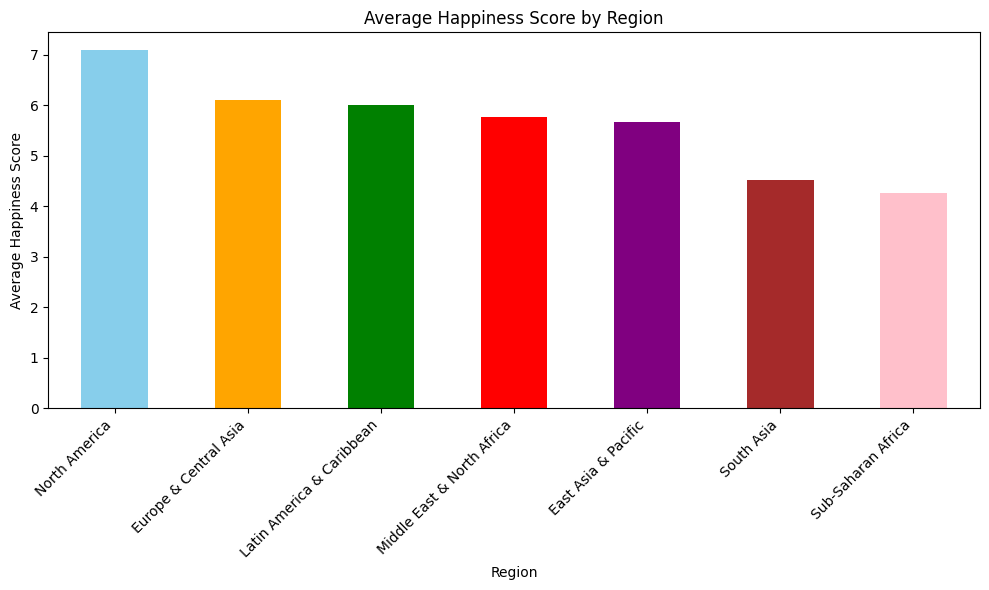

In [ ]:
"""
9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.
"""

# Fusionar los DataFrames usando los campos "Country or region" y "TableName"
merged_df = pd.merge(happiness_df, metadata_df, left_on="Country or region", right_on="TableName")

# Función para obtener la región adecuada
def get_region(row):
    if pd.isnull(row["Region"]):
        special_notes = row["SpecialNotes"]
        if "(IDA & IBRD countries) aggregate" in special_notes:
            region = special_notes.split("(IDA & IBRD countries) aggregate")[0].strip()
        else:
            region = "Unknown"
        return region
    else:
        return row["Region"]

# Aplicar la función para obtener la región adecuada
merged_df["Region"] = merged_df.apply(get_region, axis=1)

# Calcular la felicidad promedio por región
average_happiness_by_region = merged_df.groupby("Region")["Score"].mean().sort_values(ascending=False)

# Definir colores para cada región
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Graficar la felicidad promedio por región
plt.figure(figsize=(10, 6))
average_happiness_by_region.plot(kind="bar", color=colors)
plt.title("Average Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Average Happiness Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()